# Machine Learning: Gradiente Descendente Estocástico

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0) # Para termos sempre os mesmos números aleatórios.

Utilizaremos o dataset "Data for Admission in the University", disponível no Kaggle.

In [2]:
data = pd.read_csv('adm_data.csv')

### Visualizando o dataset

In [3]:
data.shape

(400, 9)

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Definições:

__Serial No.:__ número de série do estudante (índice + 1)

__GRE Score:__ pontuação do estudante no GRE (Graduate Record Examination), um exame padronizado semelhante ao GMAT.

__TOEFL Score:__ pontuação no TOEFL, um exame completo de inglês utilizado, entre outras coisas, para admissão em universidades.

__University Rating:__ avaliação da universidade (quanto maior, mais conceituada é a universidade na qual o estudante quer entrar).

__SOP:__ avaliação do Statement of Purpose, uma redação explicando o propósito do estudante ao aplicar para uma vaga em uma dada graduação em uma universidade.

__LOR:__ avaliação da Letter of Recommendation, a carta de recomendação do estudante para a universidade.

__CGPA:__ Cumulative Grade Point Average, é uma pontuação utilizada para medir o desempenho médio de um estudante.

__Research:__ experiência em pesquisa (1 se o estudante tiver, 0 se não).

__Chance of Admit:__ chance de admissão na universidade, indo de 0 a 1 (100%).

### Definição da label e das features

Nossa label (y) será a Chance of Admit.

A lista de colunas ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"] contém as features altamente correlacionadas com a chance de admissão na universidade. No nosso caso, iremos tratar apenas das features contínuas, sendo a lista de features que pode ser utilizada a seguinte: features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"].

Implementaremos o algoritmo de __Gradiente Descendente Estocástico em mini-lotes__  nos seguintes casos:

1) Modelo de Regressão Linear com 1 feature.

2) Modelo de Regressão Linear com todas as features contínuas do dataset.

### 1) Modelo de Regressão Linear com 1 feature

O modelo será da forma: 

$\hat{y} = w_{1}x_{1} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dado um valor da feature $x_{1}$, $w_{1}$ é o peso (weight) associado à feature $x_{1}$ e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, também chamada de squared loss. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Em que n é o número de dados que iremos utilizar no aprendizado de nosso modelo.

Podemos escrevê-la ainda como função explícita dos parâmetros $w_{1}$ e $b$:

$loss = f(w_{1}, b) = \frac{1}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})^2$

Como queremos reduzir a perda de nosso modelo ao máximo, devemos fazer os parâmetros variarem na direção do  negativo do gradiente de f (esse é o princípio do algoritmo de Gradiente Descendente Estocástico). 

Nesse contexto, chamemos $\theta = (w_{1}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como sendo a taxa de aprendizagem do modelo, a qual afeta diretamente a velocidade de convergência do modelo para os parâmetros ideais.

Assim, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, b)$

Onde $\nabla f(w_{1}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{1}} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{1}' = w_{1} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Com isso em mente, iremos implementar o modelo de regressão linear que se adequa aos dados através do Gradiente Descendente Estocástico em mini-lotes.

In [403]:
class Linear_Regression_Model():
    def __init__(self, feature, label, w1, b, alpha):
        self.feature = feature
        self.label = label
        self.w1 = w1
        self.b = b
        self.alpha = alpha
        
    def print_parameters(self):
        print(f'w1 = {self.w1}\nb = {self.b}')
        
    def get_prediction(self, x1):
        return self.w1*x1 + self.b
        
    def get_loss(self):
        loss = 0
        n = len(self.feature)
        for (x1, y) in zip(self.feature, self.label):
            loss += (1/n)*(self.get_prediction(x1) - y)**2
        return loss
        
    def sgd_update_parameters(self, batch_size: int):
        index_list = list(range(0, len(self.feature)))
        random_indices = np.random.choice(index_list, size = batch_size, replace = True) # bootstrap sample
        x1_sample = self.feature.iloc[random_indices]
        y_sample = self.label.iloc[random_indices]
        old_w1 = self.w1
        old_b = self.b
        for (x1, y) in zip(x1_sample, y_sample):
            partial_w1 = (2/batch_size) * (old_w1*x1 + old_b - y) * x1
            partial_b = (2/batch_size) * (old_w1*x1 + old_b - y)
            self.w1 -= self.alpha * partial_w1
            self.b -= self.alpha * partial_b
        
    def sgd(self, iterations, batch_size, print_loss): # stochastic gradient descent
        for i in range(0, iterations):
            self.sgd_update_parameters(batch_size)
            if print_loss:
                print(f'loss = {self.get_loss()}')

In [404]:
feature = data['CGPA']
label = data['Chance of Admit']

In [405]:
model = Linear_Regression_Model(feature = feature, label = label, w1 = 0.2, b = -1, alpha = 0.01)

In [406]:
model.sgd(iterations = 100000, batch_size = 10, print_loss = False)

In [407]:
model.print_parameters()

w1 = 0.2112039705108394
b = -1.071915360318939


### Plotando a reta de regressão obtida através do SGD e comparando com a curva analítica

#### Bibliotecas

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Obtendo os parâmetros da curva analítica através do numpy

In [409]:
m_np, b_np = np.polyfit(feature, label, 1)

In [410]:
m_np

0.20884722950069112

In [411]:
b_np

-1.071511662934231

#### Obtendo os pontos da reta SGD

In [412]:
x = np.arange(0, 10.01, 0.01)
y_sgd = []
for x1 in x:
    y_sgd.append(model.get_prediction(x1))
y_sgd = np.array(y_sgd)

#### Plot das retas

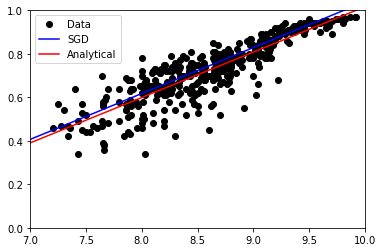

In [422]:
plt.plot(feature, label, 'o', color = 'black') # Plot dos dados
plt.plot(x, y_sgd, color = 'blue') # Plot da reta SGD
plt.plot(x, m_np*x + b_np, color = 'red') # Plot da reta de regressão analítica
plt.xlim([7.0, 10.0])
plt.ylim([0, 1])
plt.legend(['Data', 'SGD', 'Analytical'])